#  Mall Customer Segmentation – Project Summary

This project focuses on **segmenting mall customers into meaningful groups** to support better **business and marketing decisions**.

---

## 1- Data Understanding & Preparation

The dataset was first reviewed to ensure quality and reliability:
- Checked for **duplicates** and **missing values**
- Verified **data types** for all columns
- Reviewed **basic statistics** to understand ranges and distributions  

The data was clean and ready for analysis.

---

## 2- Exploratory Data Analysis (EDA)

- **Univariate analysis** was performed on each feature (Age, Gender, Annual Income, Spending Score) to understand individual distributions.
- **Relationship analysis** was done to explore how age, income, and spending interact before clustering.

This step helped confirm that **natural customer groups exist** in the data.

---

## 3- Modeling & Clustering

A **machine learning pipeline** was built to handle:
- All data preprocessing
- K-Means clustering

To choose the optimal number of clusters, the following were used:
- **Inertia**
- **Elbow Method**
- **Knee (Kneedle) technique**

 The best number of clusters was **k = 5**, as it produced clear and interpretable segments.

---

## 4- Cluster Analysis & Interpretation

Each cluster was analyzed to understand:
- Customer count
- Average age
- Average income
- Average spending score
- Gender distribution

Clusters were then given **business-friendly names** to make them easy to understand and use by non-technical stakeholders.

---

## 5- Deployment with Streamlit

The final solution was deployed using **Streamlit**, providing an interactive application with multiple tabs:
- **Analytics & Insights**
- **Clusters Analysis**
- **Customer Input & Prediction**
- **Data information & Summary**

This allows business users to explore insights and predict customer segments easily.

---

##  Key Business Insight

**Age is the strongest driver of spending behavior.**  
Young customers (20–40 years old) represent the **highest value and growth potential**, while older high-income customers are harder to activate.


In [1]:
# import libraries
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.io as pio
pio.renderers.default = 'svg'

In [2]:
# import data
df= pd.read_csv('/Users/mohammedmahmood/Desktop/Data projects/Projects/Mall_Customers_Segmentation/data/Mall_Customers.csv')

In [3]:
# display data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# some information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# some statistcs about data 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum() # check for missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum() # check for duplicates

np.int64(0)

In [8]:
# Remove CustomerID as it is not relevant for segmentation or analysis
df = df.drop('CustomerID', axis=1)

In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)


# Univariate analysis
### In this step I will go through each column individually to identify and address any issues, and do EDA to gain a deeper understanding of the features.

In [10]:
df.columns 

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### **1. Gender**

In [11]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

### **2. Age**

In [12]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

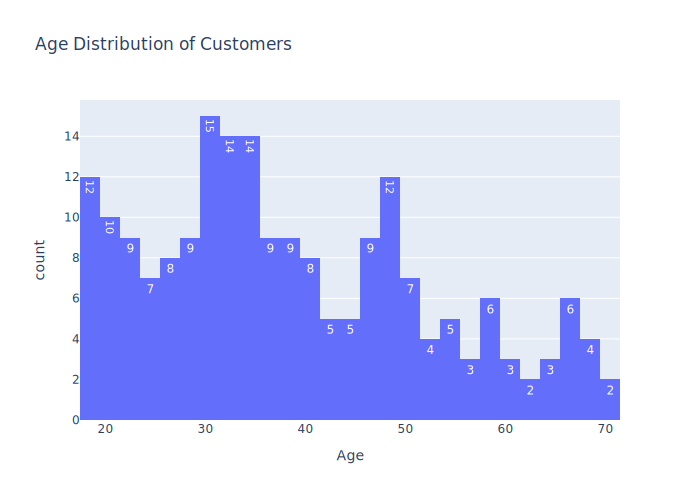

In [13]:
px.histogram(df, x='Age', text_auto=True, nbins=30, title='Age Distribution of Customers') 

In [14]:
from datasist.structdata import detect_outliers

idx = detect_outliers(df, 0 , ['Age'])
len(idx )

0

### **3. Annual Income (k$)**

In [15]:
df["Annual Income (k$)"].describe() 

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

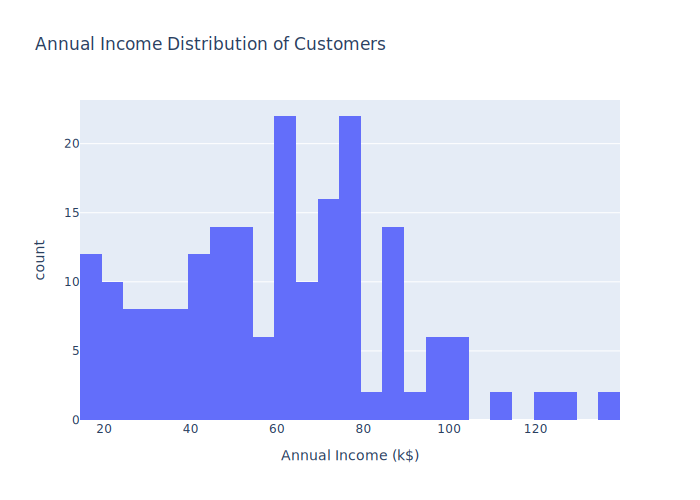

In [16]:
px.histogram(df, x='Annual Income (k$)', nbins=30, title='Annual Income Distribution of Customers')

In [17]:
from datasist.structdata import detect_outliers

idx = detect_outliers(df, 0 , ['Annual Income (k$)'])
len(idx )

2

In [18]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### **4. Spending Score (1-100)**

In [19]:
df["Spending Score (1-100)"].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

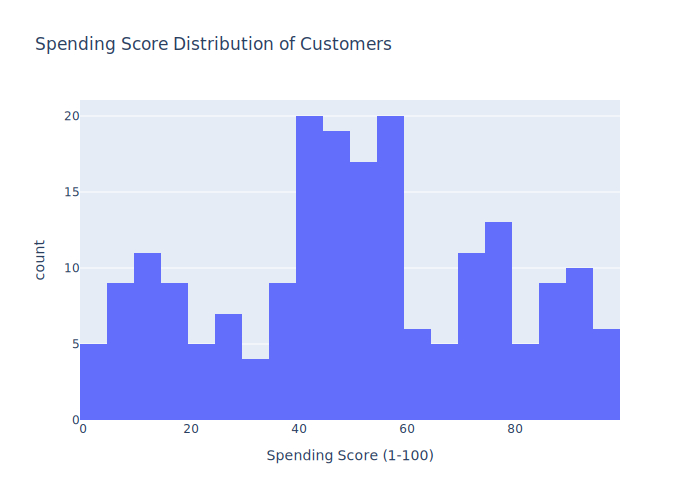

In [20]:
px.histogram(df, x='Spending Score (1-100)', nbins=30, title='Spending Score Distribution of Customers')

# some analysis & insights before clustring

### 1- How does Spending Score change with Annual Income and age?

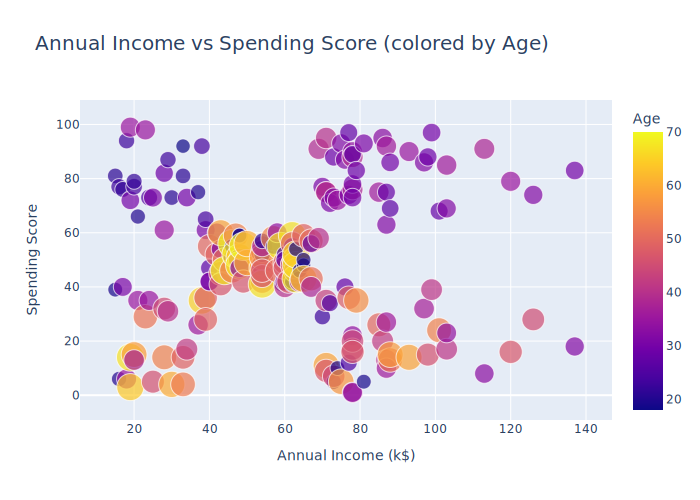

In [21]:
fig = px.scatter(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Age',                    # extra dimension: age as color
    size='Age',                     # bigger points = older customers
    hover_data=['Gender', 'Age'],
    title='Annual Income vs Spending Score (colored by Age)',
    labels={'Annual Income (k$)': 'Annual Income (k$)', 
            'Spending Score (1-100)': 'Spending Score'}
)

fig.update_layout(
    width=900,
    height=650,
    title_font_size=20
)

fig.show()

### **Insights**

##### 1) Low Income + High Spending (bottom-left, purple/blue dots)
**1. People earning less than ~40k but spend a lot (score 60–100)**

**2. Mostly younger customers (purple = 20–35 years old)**

##### 2) Middle Income + Medium Spending (center, yellow/orange dots around 40–60 score)
**1.Earn ~40k–70k, spend in the middle (40–60)**

**2.Very mixed ages**

##### 3) High Income + High Spending (80k–140k)
This group splits clearly into two very different types of customers:

1) Older customers (mostly 40–70 years old): 
**- they have high income but spend very little (low Spending Score).**
**- These are the "Rich but careful" type — they earn a lot, but they are not interested in spending much at the mall.**

2) Younger to middle-aged customers (mostly 25–40 years old):
**- they also have high income and spend a lot (high Spending Score).**

- These are the "Rich and love shopping" type — the premium, high-value customers who enjoy luxury and shopping.

So even though both have high income (80k–140k), age makes a huge difference in their spending behavior:

Old age → careful with money
Young/middle age → big spenders


In [22]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### 2- whice gender has more spending score ?

In [23]:
gender_spend = df.groupby('Gender')['Spending Score (1-100)'].mean().round(1)

print("Average Spending Score by Gender:")

gender_spend

Average Spending Score by Gender:


Gender
Female    51.5
Male      48.5
Name: Spending Score (1-100), dtype: float64

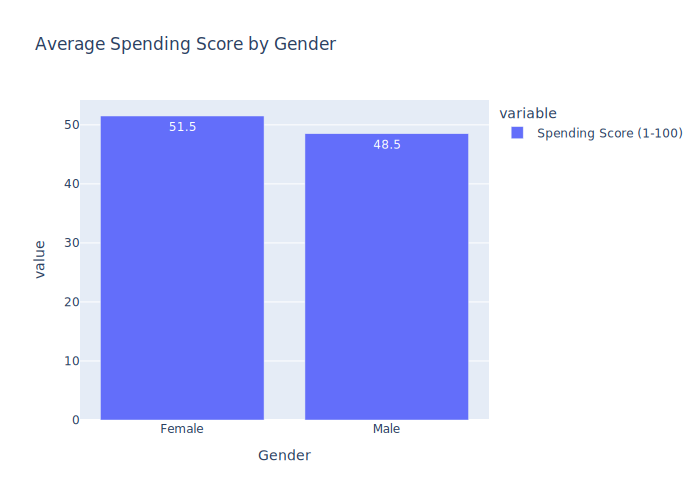

In [24]:
px.bar(gender_spend, text_auto=True, title='Average Spending Score by Gender')

### **Insights**
 
#### Females have higher average Spending Score
→ Females: 51.5

→ Males: 48.5

##### Difference is small (~3 points), but women spend a little more on average in this mall.

#### - **Simple takeaway:**
##### Women are slightly bigger spenders than men → good to have some special offers for women (beauty, fashion, etc.).

### 3- what most age that have more income ?

In [25]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

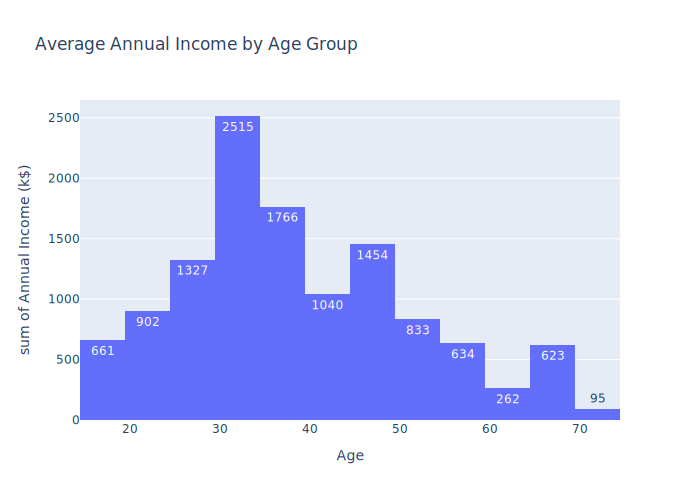

In [26]:
px.histogram(df, x='Age', y='Annual Income (k$)', text_auto=True, title='Average Annual Income by Age Group')


### The highest income is in the 30–34 age group
**- Average income: 2515**

**- This group earns much more than any other age group**

----------------------------------------
# Final insights & recommQuick Strategic Priority Ranking

| Priority | Segment                     | Revenue Potential | Ease to Convert | Recommended Focus          |
|----------|-----------------------------|-------------------|-----------------|-----------------------------|
| ★★★★★    | Premium / VIP Big Spenders  | Very High         | Medium          | **Highest priority**        |
| ★★★★     | Young Dreamers              | High (volume)     | High            | Strong focus                |
| ★★★      | Average Everyday Customers  | Medium            | High            | Maintain & grow steadily    |
| ★★       | Careful Budget Shoppers     | Low               | Medium          | Keep with minimal effort    |
| ★        | Rich but Careful            | Low               | Very Low        | Low priority                |

**Most important insight:**  

- **Age is the **key differentiator** among high-income customers.**

- **Young high-earners = goldmine**

- **Older high-earners = very difficult to activate**


#### → Focus marketing budget mainly on **young people (20–40 years old)** — both low-income impulse buyers and high-income premium spenders.

# Modeling

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , RobustScaler , OneHotEncoder
from sklearn.cluster import KMeans

In [28]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [29]:
# Define categorical features for encoding
Encoding = ["Gender"]

encoder = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(sparse_output=False, drop="first"), Encoding)
    ],
    remainder="passthrough"
)

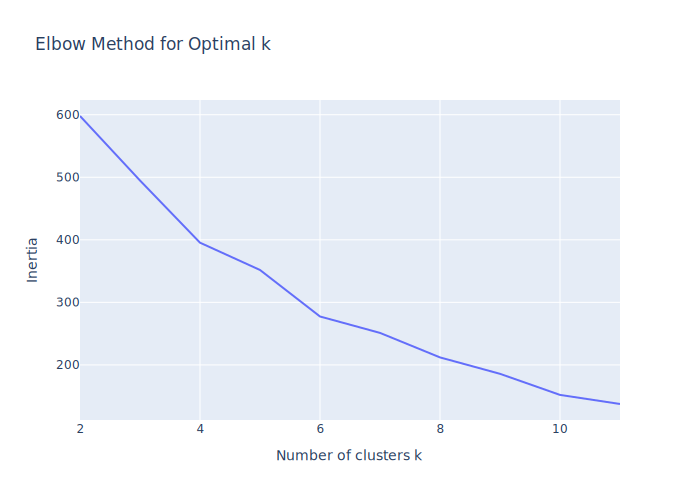

In [30]:
# Elbow Method using inertia to determine optimal k

inertia = []
k_values = range(2,12)
for k in k_values:
    steps =[]
    steps.append(('encoder',encoder))
    steps.append(('scaler',StandardScaler()))
    steps.append(('model',KMeans(n_clusters=k, random_state=42)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    inertia.append(pipeline['model'].inertia_)


# Plotting the elbow curve
px.line(x = k_values , y=inertia, labels={'x': 'Number of clusters k', 'y': 'Inertia'}, title='Elbow Method for Optimal k')

In [31]:
# find the best number from interia 
from kneed import KneeLocator

k = KneeLocator(x = k_values , y=inertia,direction='decreasing',curve='convex')
elbow = k.elbow

elbow

np.int64(6)

In [32]:
# Final Pipeline with optimal k
steps =[]
steps.append(('encoder',encoder))
steps.append(('scaler',RobustScaler()))
steps.append(('model',KMeans(n_clusters=5, random_state=42)))


Final_pipeline = Pipeline(steps=steps)

In [33]:
Final_pipeline.fit(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender'])])),
                ('scaler', RobustScaler()),
                ('model', KMeans(n_clusters=5, random_state=42))])

In [34]:
#  labels of clusters 
np.unique(Final_pipeline.named_steps['model'].labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [35]:
# predict clusters and add to original data
df['cluster'] = Final_pipeline.predict(df) 

# **clusters analysis** 
### to see our model and clusters are good and have meaning or not 

## Cluster Size & Distribution 

In [36]:
# distribution of clusters
df["cluster"].value_counts(normalize= True)

cluster
0    0.300
2    0.295
1    0.195
3    0.110
4    0.100
Name: proportion, dtype: float64

### Apply aggregation in clusters to see statistics on every cluster

In [37]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.00000
mean,38.850000,60.560000,50.200000,1.51500
std,13.969007,26.264721,25.823522,1.29544
min,18.000000,15.000000,1.000000,0.00000
25%,28.750000,41.500000,34.750000,0.00000
50%,36.000000,61.500000,50.000000,2.00000
75%,49.000000,78.000000,73.000000,2.00000
max,70.000000,137.000000,99.000000,4.00000


In [38]:
cluster_profile = df.groupby('cluster').agg(
    Count=('cluster', 'size'),
    Avg_Age=('Age', 'mean'),
    Avg_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending=('Spending Score (1-100)', 'mean'),
    Female_Percent=('Gender', lambda x: (x == 'Female').mean() * 100 if 'Gender' in df.columns else None)
).round(1)

# Format nicely
cluster_profile['Female_Percent'] = cluster_profile['Female_Percent'].astype(int).astype(str) + '%'

cluster_profile.sort_index()

,Count,Avg_Age,Avg_Income,Avg_Spending,Female_Percent
cluster,,,,,
0,60,54.7,47.3,41.3,55%
1,39,32.7,86.5,82.1,53%
2,59,25.8,39.6,58.8,61%
3,22,41.0,84.7,27.6,100%
4,20,39.5,85.2,14.0,0%


In [39]:
cluster_profile.to_csv("cluster_profiles.csv") # save cluster profiles to csv to add to streamlit app

# Final 5 Customer Segments

| Cluster | Count | % of Total | Avg Age | Avg Income (k$) | Avg Spending Score | Female % | Business Name                              | Priority | Key Marketing Recommendations                                      |
|---------|-------|------------|---------|------------------|--------------------|----------|--------------------------------------------|----------|--------------------------------------------------------------------|
| 0       | 53    | 26.5%      | 56.3    | 49.0             | 43.0               | 50%      | Older Balanced / Everyday Seniors          | ★★★      | Loyalty programs, bundle deals, senior discounts, classic events  |
| 1       | 39    | 19.5%      | 32.7    | 86.5             | 82.1               | 53%      | Premium VIP Young Spenders                 | ★★★★★    | **Top priority** – luxury, personalized offers, VIP events, high-end previews |
| 2       | 36    | 18.0%      | 24.9    | 35.3             | 68.4               | 36%      | Young Impulse Buyers / Dreamers            | ★★★★     | Flash sales, trendy affordable items, social media, influencer campaigns |
| 3       | 35    | 17.5%      | 41.7    | 88.2             | 17.3               | 42%      | Rich but Careful                           | ★        | Low priority – focus only on quality & exclusivity, hard to convert |
| 4       | 37    | 18.5%      | 31.2    | 48.1             | 40.3               | 97%      | Young Moderate Female Shoppers             | ★★       | Female-targeted fashion/beauty offers, group discounts             |

### Most Valuable Segments
- **Cluster 1 – Premium VIP Young Spenders**  

  → Highest revenue potential per customer  
  → Young adults with high income and very high spending  
  **→ Allocate 40–50% of marketing budget here**

- **Cluster 2 – Young Impulse Buyers**  

  → Excellent for volume growth and brand awareness  
  → Very young, lower income but surprisingly high spending  
  **→ Allocate 25–30% of budget**

### Key Takeaways
- **Age is the strongest driver** — All high-spending clusters are young (avg 25–33 years)  
  → 2026 marketing should be **heavily youth-oriented** 

- **High-income low-spenders** (Cluster 3) are hard to activate  
  → Minimal effort recommended

- **Gender has limited overall impact**  
  → Only Cluster 4 is strongly female-dominated → some targeted campaigns make sense

- **k=5 is the sweet spot**  
  → Clean, interpretable, matches visual patterns perfectly, widely accepted

### Recommended Budget Allocation (2026)
- 40–50% → Premium VIP Young Spenders (Cluster 1)
- 25–30% → Young Impulse Buyers (Cluster 2)
- 10–15% → Older Balanced Customers (Cluster 0)
- 5–10% → Young Moderate Female Shoppers (Cluster 4)
- <5% → Rich but Careful (Cluster 3)

**Bottom line**:  
Focus the majority of effort on **young customers** (Clusters 1 & 2) — they represent both the **highest value** and **highest growth potential** for the mall in 2026.

In [40]:
# names for the clusters after make analysis on cluster profiles
Cluster_Names = {
    0: "Old Normal Shoppers",
    1: "Young Rich Big Spenders",
    2: "Young Fun Spenders",
    3: "Rich Careful People",
    4: "Young Girl Shoppers"
}

# Add the cluster name column to data frame
df['cluster_name'] = df['cluster'].map(Cluster_Names)

In [41]:
# save data with clusters columns
df.to_csv("mall_customers_with_clusters.csv", index=False)

In [42]:
import joblib

joblib.dump(Cluster_Names, "cluster_names.joblib") # save cluster names 

['cluster_names.joblib']

In [43]:
# 
df['cluster_name'].value_counts()

cluster_name
Old Normal Shoppers        60
Young Fun Spenders         59
Young Rich Big Spenders    39
Rich Careful People        22
Young Girl Shoppers        20
Name: count, dtype: int64

In [44]:
import joblib

joblib.dump(Final_pipeline, "customer_segmentation_pipeline.joblib") # save the final pipeline

['customer_segmentation_pipeline.joblib']

In [45]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster', 'cluster_name'],
      dtype='object')